# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [2]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")#filters the dataframe to keep columns that only have numerical data types
ames.dropna(inplace=True)# removes any rows in the dataframe that contain missing values
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

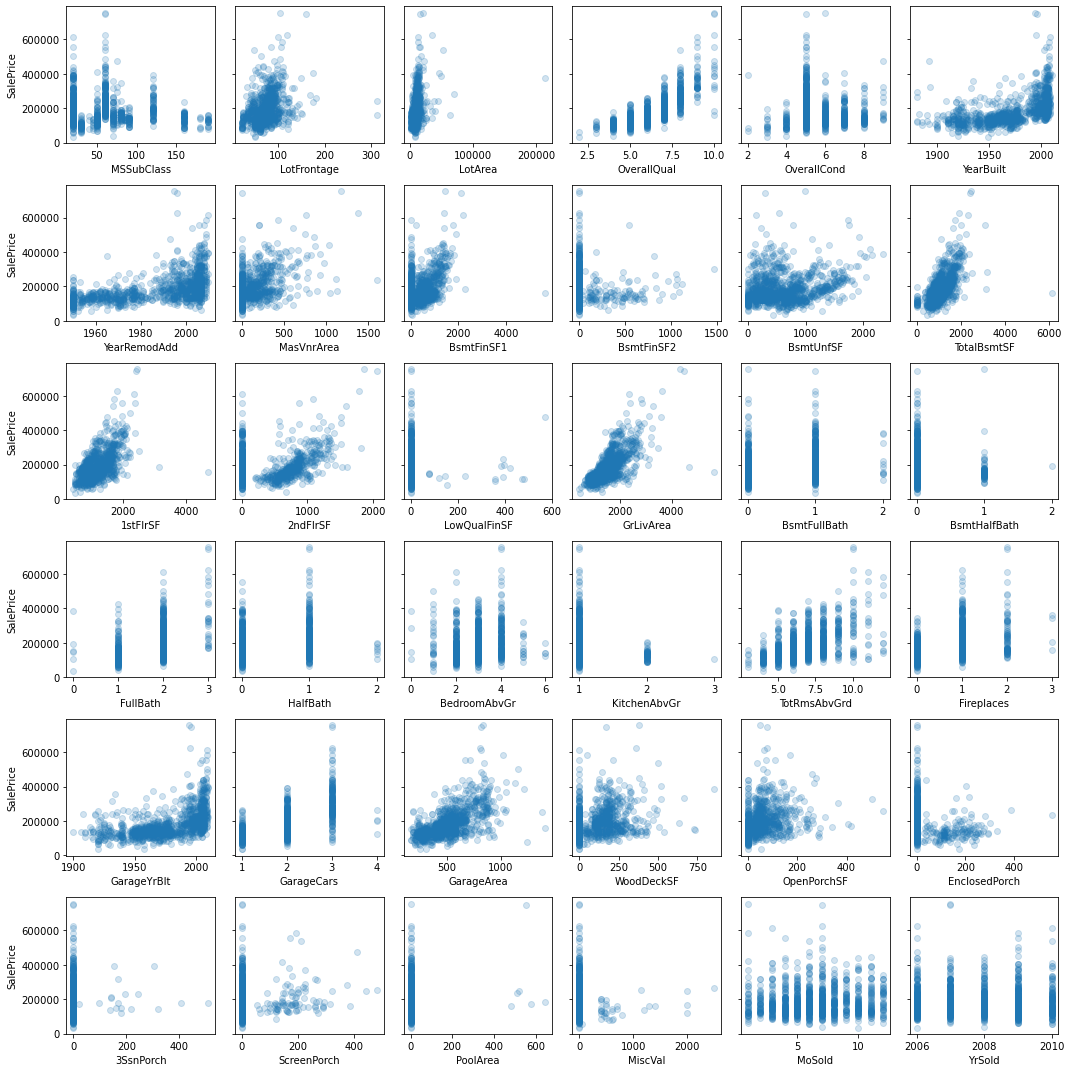

In [3]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

In [5]:
# Your written answer here
x_raw = ames[['YearBuilt','YearRemodAdd','GarageYrBlt','GarageArea']]

### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

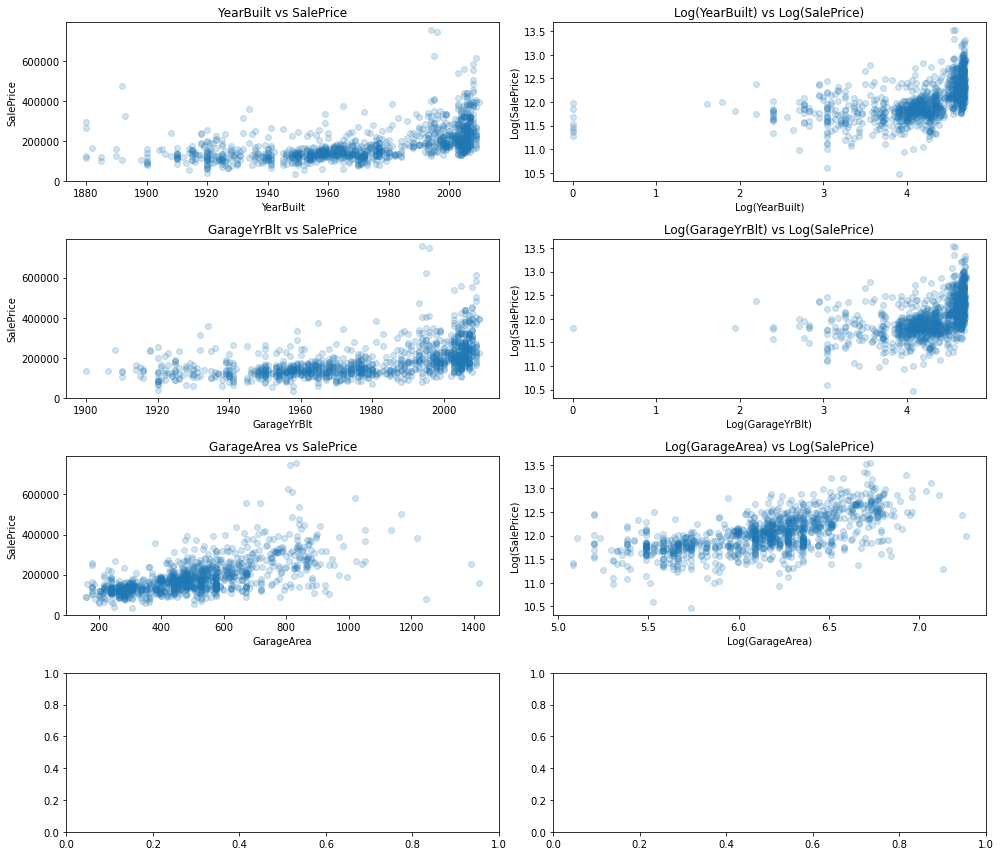

In [14]:
# Your code here
#log transformation for the features and saleprice
x_log = np.log(x_raw + 1)#adding 1 to avoid log (0)
y_log = np.log(ames['SalePrice'])

#set up the figure and axes for plotting
fig,axes = plt.subplots(nrows=4, ncols=2,figsize =(14,12))

#iterate over each feature and plot
for i,column in enumerate(x_raw.columns):
    #plot the original feature vs saleprice
    axes[i ,0].scatter(x_raw[column],ames['SalePrice'],alpha = 0.2)
    axes[i ,0].set_xlabel(column)
    axes[i, 0].set_ylabel('SalePrice')
    axes[i, 0].set_title(f"{column} vs SalePrice")

    #plot the log-transformed feature vs.log transformed saleprice
    axes[i, 1].scatter(X_log[column], y_log, alpha=0.2)
    axes[i, 1].set_xlabel(f'Log({column})')
    axes[i, 1].set_ylabel('Log(SalePrice)')
    axes[i, 1].set_title(f'Log({column}) vs Log(SalePrice)')

#plot the results
fig.tight_layout()
plt.show()


Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [16]:
# Your code here - prepare data for modeling
#Choose features and shift year_based features
x_raw = ames[['YearBuilt', 'GarageYrBlt', 'GarageArea']]
x_shifted = x_raw.copy()
x_shifted['YearBuilt'] = x_shifted['YearBuilt'] - 1900
x_shifted['GarageYrBlt'] = x_shifted['GarageYrBlt'] - 1900

#log transform the features and the target
x_log = np.log(x_shifted + 1) #adding 1 to avoid log(o)
y_log = np.log(ames['SalePrice'])

#display the results
x_log.head(),y_log.head()


<ipython-input-16-153cfd67e758>:9: RuntimeWarning: invalid value encountered in log
  x_log = np.log(x_shifted + 1) #adding 1 to avoid log(o)


(    YearBuilt  GarageYrBlt  GarageArea
 Id                                    
 1    4.644391     4.644391    6.308098
 2    4.343805     4.343805    6.133398
 3    4.624973     4.624973    6.411818
 4    2.772589     4.595120    6.466145
 5    4.615121     4.615121    6.729824,
 Id
 1    12.247694
 2    12.109011
 3    12.317167
 4    11.849398
 5    12.429216
 Name: SalePrice, dtype: float64)

### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [18]:
# Your code here - build a model
import statsmodels.api as sm

#removing rows with -inf,inf or nans in the dataset
x_log = x_log.replace([np.inf,-np.inf],np.nan).dropna()
y_log = y_log[x_log.index] #aligning y_log with cleaned x_log
#add constant
x_log = sm.add_constant(x_log)
#create the model
log_model = sm.OLS(y_log,x_log)
#fit the model
log_model_results = log_model.fit()


### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

In [19]:
# Your code here - evaluate the model
print(log_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     307.5
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          4.49e-145
Time:                        15:11:51   Log-Likelihood:                -207.52
No. Observations:                1108   AIC:                             423.0
Df Residuals:                    1104   BIC:                             443.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.1831      0.139     58.795      

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.